# HW1: Introduction to RL
> - Full Name: **Danial Parnian**
> - Student ID: **401110307**


This notebook is designed to provide hands-on experience with RL modeling, algorithm implementation, and performance evaluation. Students will explore RL concepts through predefined environments and custom-designed settings.

Follow the instructions in each section to complete the homework.

## Setup Instructions
Seting up RL dependecies for first time may be challenging. Some  torch or gymnasium (Sklearn lib in SL world!) environments need additional set up on your system. If you encountered error and failure after hours of search and try, feel free to be in contact with TA's.  Run the following commands to install dependencies before starting the notebook:



In [ ]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxfont2 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils xserver-common
The following NEW packages will be installed:
  libxfont2 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 7 newly installed, 0 to remove and 20 not upgraded.
Need to get 7,728 kB of archives.
After this operation, 11.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 xfonts-encodings all 1:1.0.5-0ubuntu2 [578 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 xfonts-utils amd64 1:7.7+6build2 [94.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 xfonts-base a

In [ ]:
!pip install pyvirtualdisplay > /dev/null 2>&1
!pip install swig
!pip install stable-baselines3 "gymnasium[all]" pygame matplotlib numpy pandas

Hamid is CE student who loves learning about RL. He tried to use **Gymnasium** and **Stable-Baselines3** to solve games he played as a kid.  

He started to list the games which was provided in gymnasium library.

In [ ]:
from gymnasium import envs

all_envs = envs.registry
env_ids = [env_spec  for env_spec in all_envs]
print("Gymnasium envs listed:",sorted(env_ids))

Gymnasium envs listed: ['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'Blackjack-v1', 'CarRacing-v3', 'CartPole-v0', 'CartPole-v1', 'CliffWalking-v0', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'GymV21Environment-v0', 'GymV26Environment-v0', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'HumanoidStandup-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Taxi-v3', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'W

Then He selected Mountain Car Game to work with:

In [ ]:
import gymnasium as gym
env = gym.make("MountainCar-v0", render_mode="rgb_array", goal_velocity=0.1)

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

print("Action Example: {}".format(env.action_space.sample()))
print("State Example: {}".format(env.observation_space.sample()))

Action Space Discrete(3)
State Space Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Example: 1
State Example: [-0.05318264  0.06445979]


Hamid wanted to visualize the env for better understandig of gym envs. He had two options:


1.   rendering inside the colab
2.   rendering as video file



For ploting the game **inside** the colab he used **pyvirtualdisplay** package:

In [ ]:
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

display = Display(visible=0, size=(400, 300))
display.start()

So He started modify the code to learn how action works and plot it. He selected action of

 *`2: Accelerate to the right`*

For every state of car.

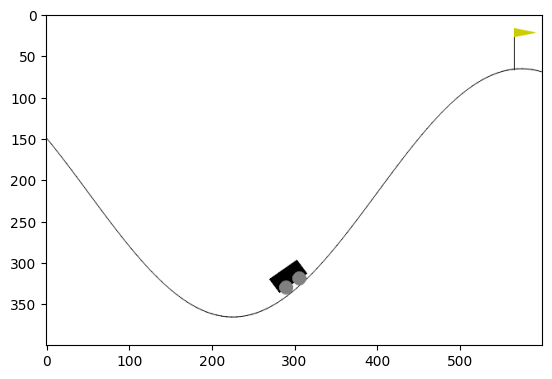

In [ ]:
env.reset()
prev_screen = env.render( )
plt.imshow(prev_screen)

for i in range(40):
  # action = env.action_space.sample()  # Random action
  action = 2 # Action Hamid modified to practice
  obs, reward,terminated, truncated, info = env.step(action)
  screen = env.render()

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if terminated:
    break

ipythondisplay.clear_output(wait=True)
env.close()

But for saving game as **video** he defined a function (it's okay if you don't understand just try to run the code and see the output, then try to modify envs!):

In [ ]:
import logging
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

training_period = 250  # record the agent's episode every 250
num_training_episodes = 1000  # total number of training episodes

env = gym.make("MountainCar-v0", render_mode="rgb_array")
env = RecordVideo(env, video_folder="MountainCar-v0-agent", name_prefix="training",
                  episode_trigger=lambda x: x % training_period == 0)
env = RecordEpisodeStatistics(env)

for episode_num in range(num_training_episodes):
    obs, info = env.reset()

    episode_over = False
    while not episode_over:
        action = env.action_space.sample()  # replace with actual agent
        obs, reward, terminated, truncated, info = env.step(action)

        episode_over = terminated or truncated

    logging.info(f"episode-{episode_num}", info["episode"])
env.close()

The videos are in MountainCar-v0-agent folder of your colab folder.

But the car couldn't reach the goal state on top of the right hill. So he tried to implement RL algorithm for learning it

In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Parallel environments can bet set but Hamid set 1 env
vec_env = make_vec_env("MountainCar-v0", n_envs=1)

model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=25000)
model.save("ppo_MountainCar")

del model # remove to demonstrate saving and loading


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -200     |
| time/              |          |
|    fps             | 1001     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 200       |
|    ep_rew_mean          | -200      |
| time/                   |           |
|    fps                  | 805       |
|    iterations           | 2         |
|    time_elapsed         | 5         |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0099586 |
|    clip_fraction        | 0.00356   |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.1      |
|    explained_variance   | -0.000253 |
|    learning_rate        | 0.0003    |
|  

**Loading saved model**

After training model using PPO and saving it, Hamid started to load the model with the name he saved in cell above:

In [ ]:
model = PPO.load("ppo_MountainCar")

obs = vec_env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    print(obs, rewards, dones, info)
    if dones[0]:
      break

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[-0.44767606 -0.00056866]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-4.4780922e-01 -1.3317345e-04]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-4.4750595e-01  3.0328988e-04]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4487684  -0.00126246]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4505874  -0.00181899]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.45294958 -0.00236221]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.45583773 -0.00288812]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.45923054 -0.00339283]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.46310315 -0.0038726 ]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.467427   -0.00432383]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.47217008 -0.00474313]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.47729743 -0.00512731]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.48277086 -0.00547346]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.48754978

# **Task 1: Solving Predefined Environments (45 points)**
1.1. Choose two environments from the list which are implemented by  other developers and communities and train RL agents using stable-baselines3. Don't forget to check workshop notebook.

**Environments:**
- [CartPole](https://gymnasium.farama.org/environments/classic_control/cart_pole/)
- [FrozenLake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)
- [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/)
- Flappy Bird (Custom env which you can google it)

📊 1.2. Algorithm Comparison:


 Compare RL algorithms and results (at least two algorithms e.g., PPO, DQN) based on:
- Total reward over time
- Hyperparameters (check the docs)


Env1 implementation. [ place for your code ]




In [ ]:
from gymnasium import envs
import gymnasium as gym
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
import logging
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

In [ ]:
from stable_baselines3 import PPO, DQN
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# def a function for training models and plotting with given parameters
def train_and_plot(env_id, total_timesteps, ppo_params, dqn_params, vec_env_given=None):
    # create environment
    if vec_env_given is not None:
        vec_env = vec_env_given
    else:
        vec_env = make_vec_env(env_id, n_envs=1)

    # train PPO with given parameters
    ppo_model = PPO("MlpPolicy", vec_env, **ppo_params, tensorboard_log="./ppo_" + env_id.lower() + "_tensorboard/")
    ppo_model.learn(total_timesteps=total_timesteps)

    # train DQN with given parameters
    dqn_model = DQN("MlpPolicy", vec_env, **dqn_params, tensorboard_log="./dqn_" + env_id.lower() + "_tensorboard/")
    dqn_model.learn(total_timesteps=total_timesteps)

    # extract rewards from tensorboard logs
    dir = "./ppo_" + env_id.lower() + "_tensorboard/"
    sub_dir = sorted(os.listdir(dir))[-1]
    event_file = os.path.join(dir, sub_dir)
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()
    reward_data = event_acc.Scalars("rollout/ep_rew_mean")
    ppo_rewards = [reward.value for reward in reward_data]
    ppo_steps = [reward.step for reward in reward_data]

    dir = "./dqn_" + env_id.lower() + "_tensorboard/"
    sub_dir = sorted(os.listdir(dir))[-1]
    event_file = os.path.join(dir, sub_dir)
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()
    reward_data = event_acc.Scalars("rollout/ep_rew_mean")
    dqn_rewards = [reward.value for reward in reward_data]
    dqn_steps = [reward.step for reward in reward_data]

    # plot reward curves
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    ax1.plot(ppo_steps, ppo_rewards, label='PPO')
    ax1.set_title('PPO Rewards')
    ax1.set_xlabel('training step')
    ax1.set_ylabel('reward')
    ax1.legend()

    ax2.plot(dqn_steps, dqn_rewards, label='DQN', color='orange')
    ax2.set_title('DQN Rewards')
    ax2.set_xlabel('training step')
    ax2.set_ylabel('reward')
    ax2.legend()

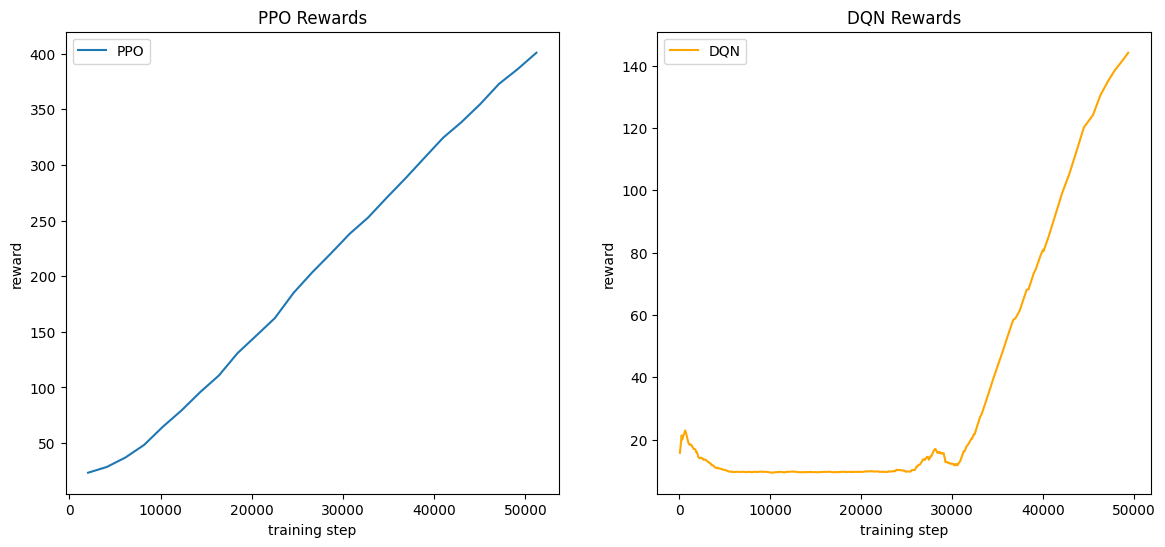

In [ ]:
# define initial parameters
ppo_params = {'learning_rate': 0.0003, 'n_steps': 2048, 'batch_size': 64, 'verbose': 0}
dqn_params = {'learning_rate': 0.0003, 'buffer_size': 500000, 'batch_size': 64, 'verbose': 0}
total_timesteps = 50000
# train and plot env1
train_and_plot("CartPole-v1", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params)

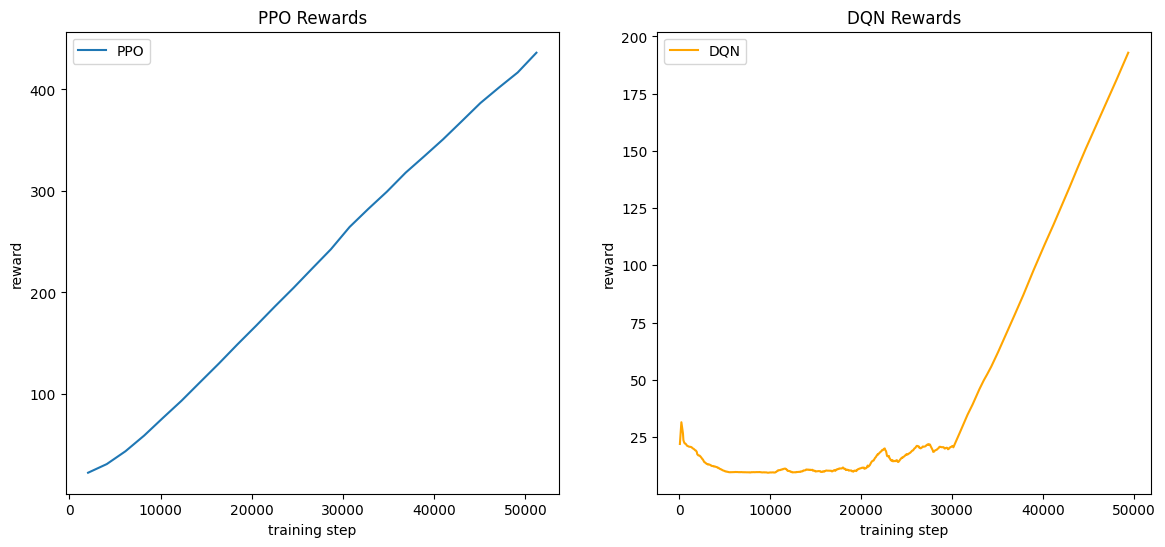

In [ ]:
# modify hyperparameters and plot reward curves
# adjust lr
ppo_params['learning_rate'] = 0.001
dqn_params['learning_rate'] = 0.001
train_and_plot("CartPole-v1", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params)
ppo_params['learning_rate'] = 0.0003
dqn_params['learning_rate'] = 0.0003

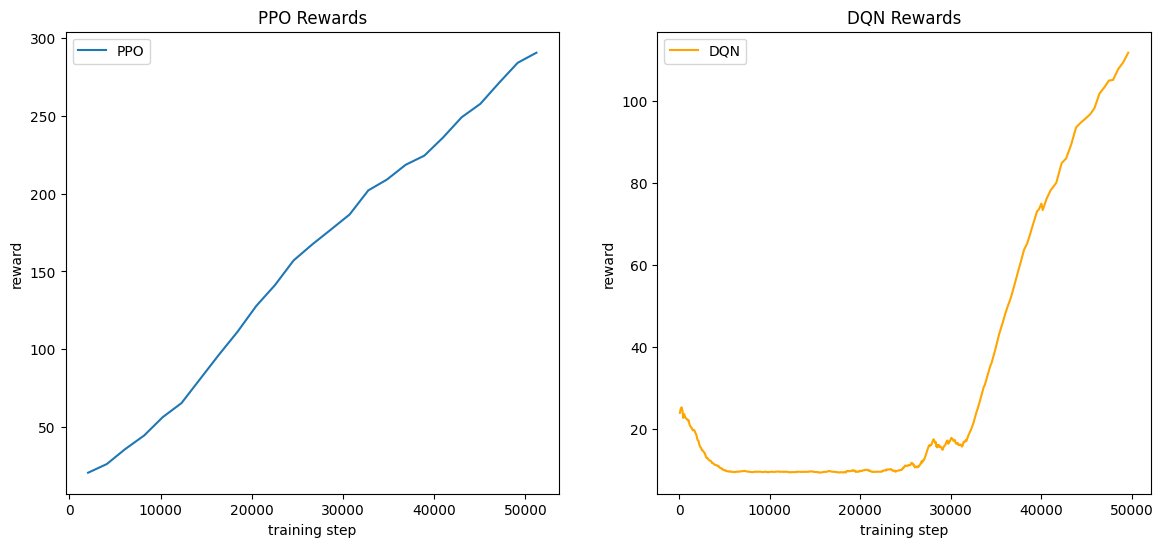

In [ ]:
# modify hyperparameters and plot reward curves
# adjust batch size
ppo_params['batch_size'] = 128
dqn_params['batch_size'] = 128
train_and_plot("CartPole-v1", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params)
ppo_params['batch_size'] = 64
dqn_params['batch_size'] = 64

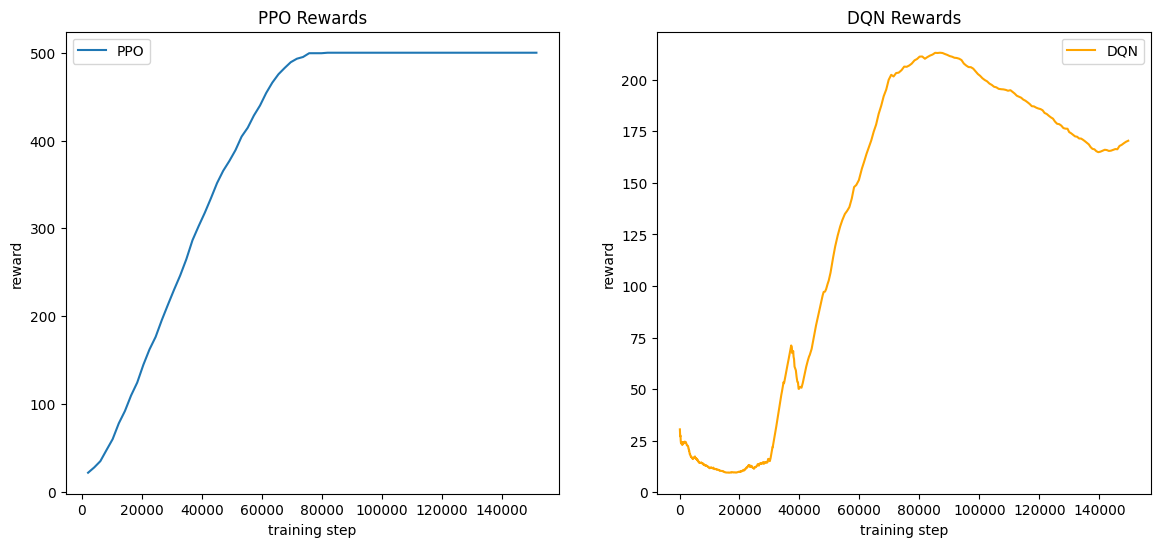

In [ ]:
# modify hyperparameters and plot reward curves
# adjust timesteps
total_timesteps = 150000
train_and_plot("CartPole-v1", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params)
total_timesteps = 50000

/usr/local/lib/python3.11/dist-packages/stable_baselines3/ppo/ppo.py:155: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 32`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 32
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=32 and n_envs=1)
  warnings.warn(


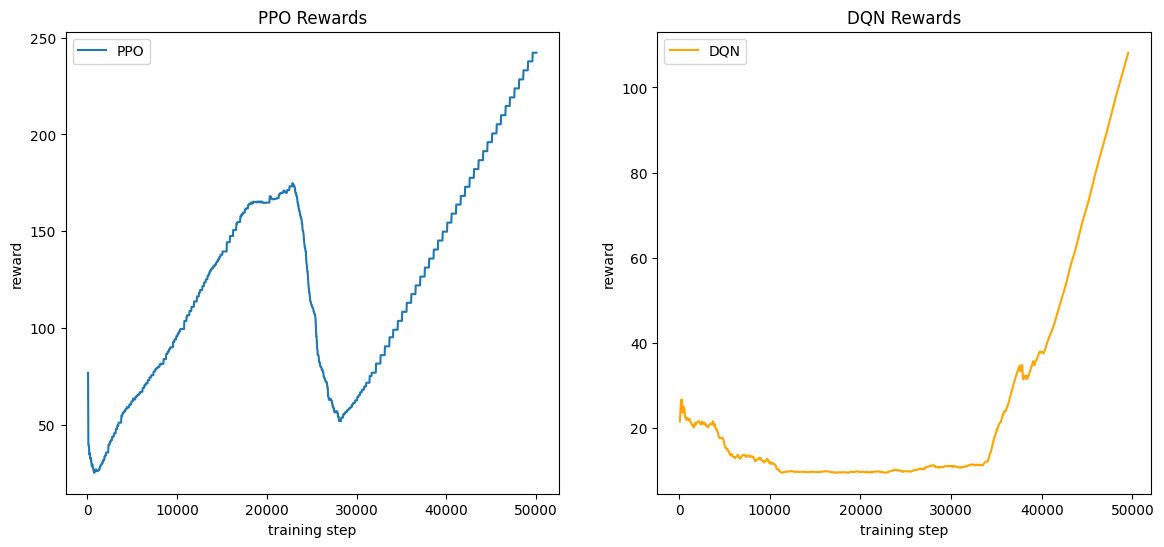

In [ ]:
# modify hyperparameters and plot reward curves
# adjust n_steps and buffer_size
ppo_params['n_steps'] = 32
dqn_params['buffer_size'] = 50000
train_and_plot("CartPole-v1", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params)
ppo_params['n_steps'] = 2048
dqn_params['buffer_size'] = 500000

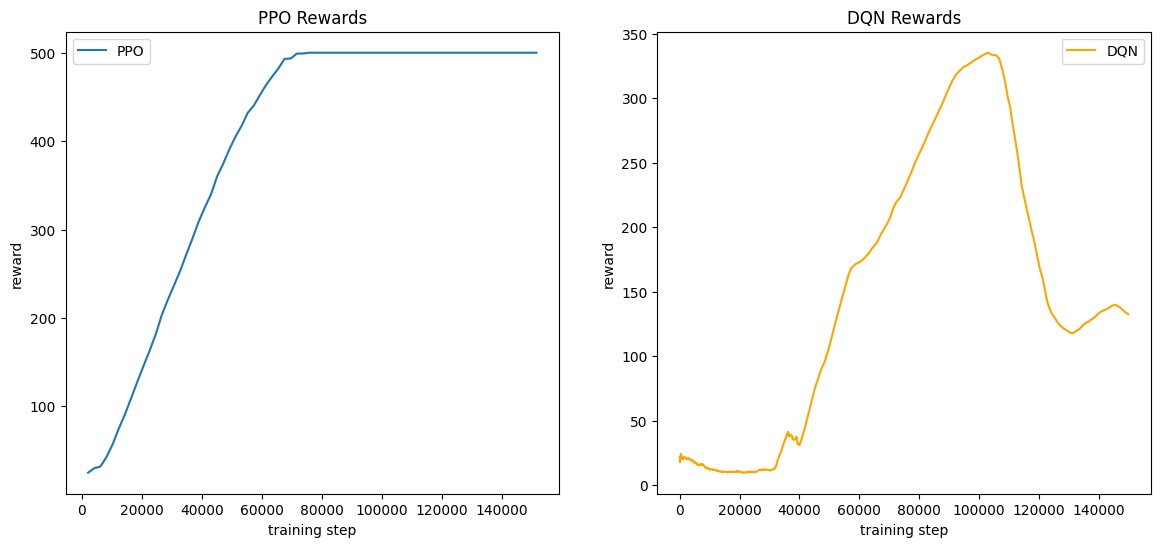

In [ ]:
# using best parameters
dqn_params['buffer_size'] = 10000
total_timesteps = 150000
train_and_plot("CartPole-v1", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params)
total_timesteps = 50000
dqn_params['buffer_size'] = 1000000

Env2 implementation. [ place for your code ]

In [ ]:
!pip install flappy_bird_gymnasium
import flappy_bird_gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 2.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/usr/local/lib/python3.11/dist-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


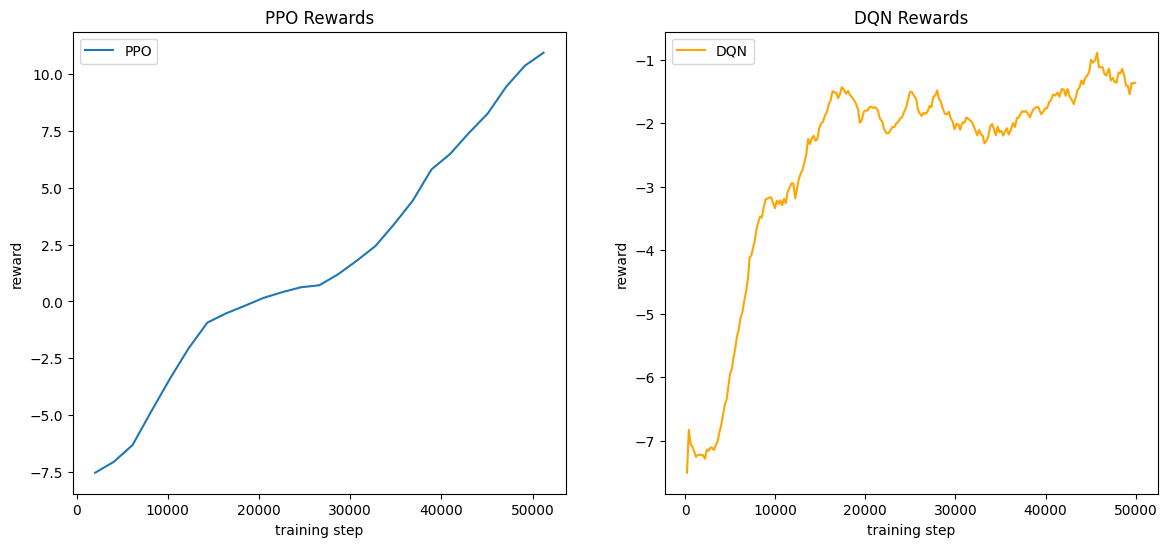

In [ ]:
# Train and plot env2
train_and_plot("FlappyBird-v0", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params)

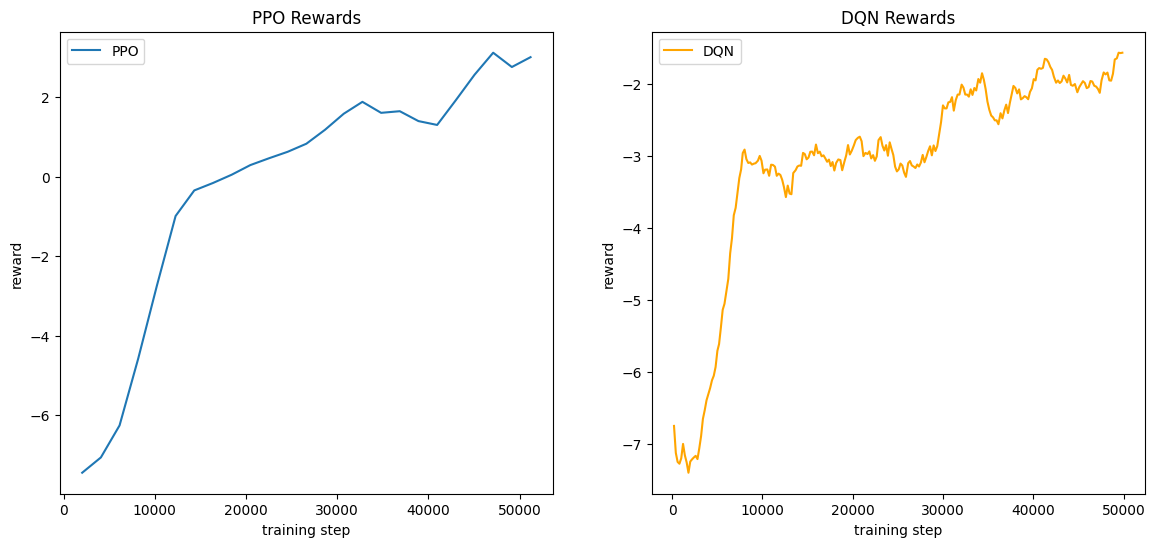

In [ ]:
# modify hyperparameters and plot reward curves
# adjust lr
ppo_params['learning_rate'] = 0.001
dqn_params['learning_rate'] = 0.001
train_and_plot("FlappyBird-v0", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params)
ppo_params['learning_rate'] = 0.0003
dqn_params['learning_rate'] = 0.0003

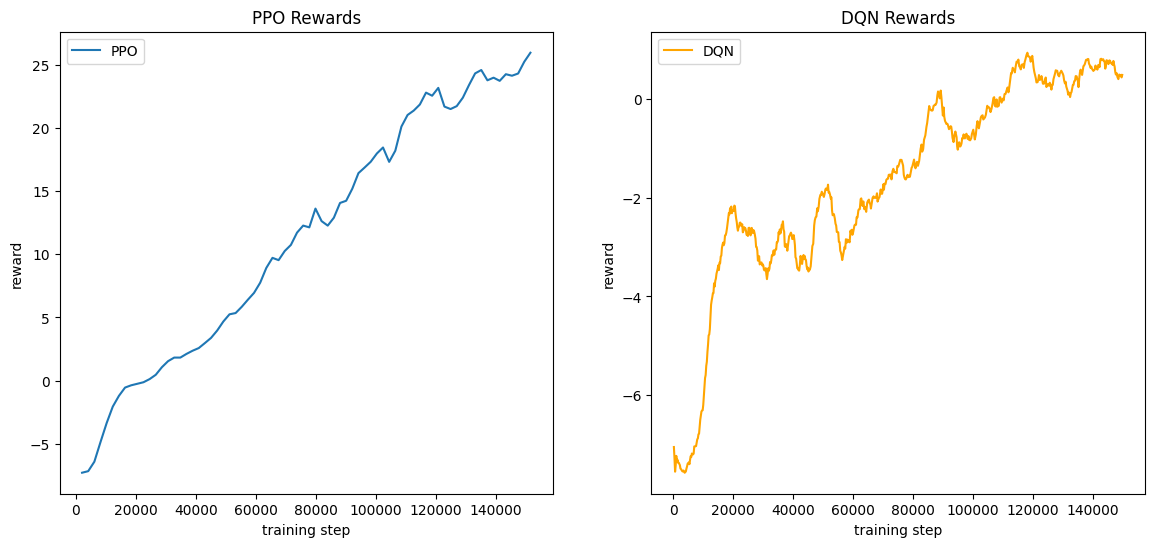

In [ ]:
# modify hyperparameters and plot reward curves
# adjust timesteps
total_timesteps = 150000
train_and_plot("FlappyBird-v0", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params)
total_timesteps = 50000

Write a wrapper for changing reward function and plot the changes. (Bonus)

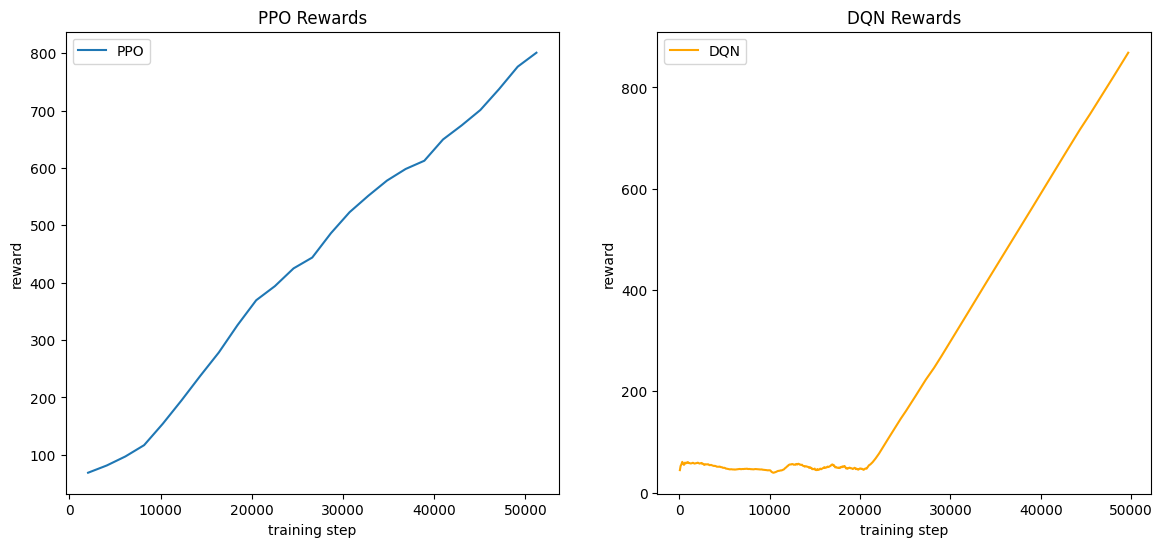

In [ ]:
# Bonus: Your wrapper for reward function
# define a custom reward wrapper
from gymnasium import RewardWrapper

class CustomRewardWrapper(RewardWrapper):
    def __init__(self, env):
        super(CustomRewardWrapper, self).__init__(env)

    def reward(self, reward):
        # modify the reward function here
        return reward * 2 + 1

# create environment with the custom reward wrapper
env = gym.make("CartPole-v1")
env = CustomRewardWrapper(env)

# wrap with vectorized environment
vec_env = make_vec_env(lambda: env, n_envs=1)

# define initial parameters
ppo_params = {'learning_rate': 0.0003, 'n_steps': 2048, 'batch_size': 64, 'verbose': 0}
dqn_params = {'learning_rate': 0.0003, 'buffer_size': 500000, 'batch_size': 64, 'verbose': 0}
total_timesteps = 50000

# train and plot the environment with the custom reward wrapper
train_and_plot("CartPole-v1", total_timesteps, ppo_params, dqn_params, vec_env)

# **Task 2: Creating Custom Environment (45 points)**
In this question, you are required to model **a custom 4*4 gridworld problem** as Markov Decision Processes (MDPs). You must define the following components:

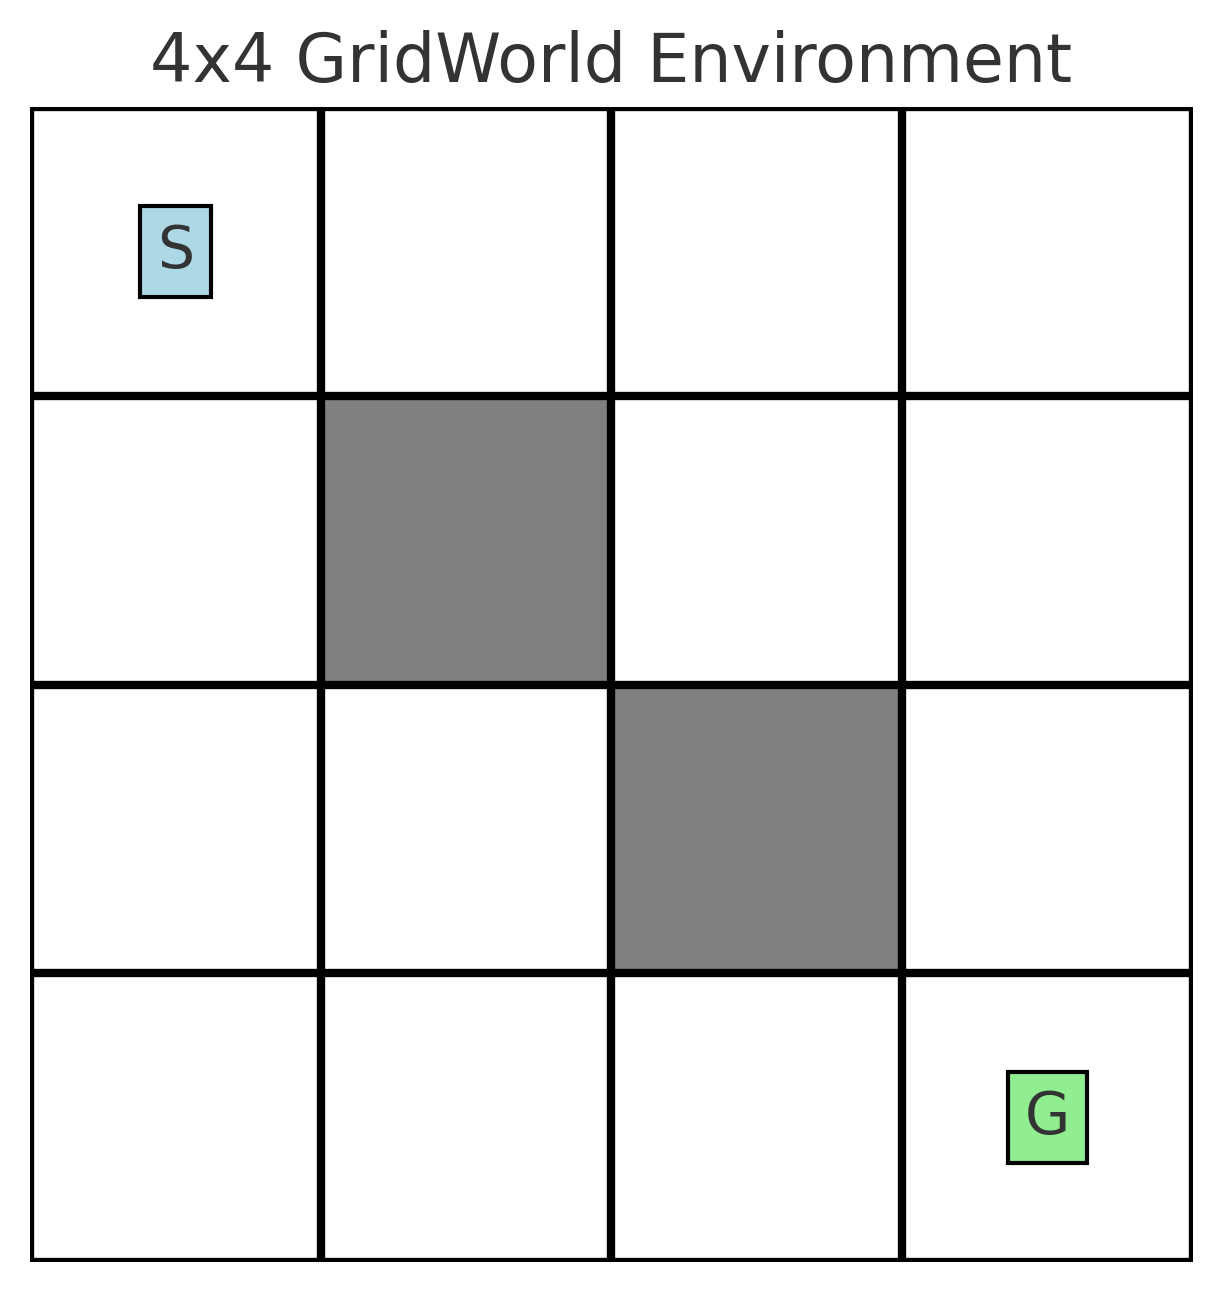

- **State Space ($ S $)**: The set of all possible states the agent can be in.
- **Action Space ($ A $)**: The set of all possible actions the agent can take.
- **Reward Function ($ R $)**: The reward the agent receives for taking an action in a given state.
- **Transition Probability ($ P $)**: The probability of transitioning to a new state given the current state and action. If the environment is deterministic, this can be omitted.

After defining the MDP components, implement problem using the **Gymnasium standard API**. Then, test the environments using various reinforcement learning algorithms (e.g., Q-Learning, DQN, PPO) and evaluate their performance.

In [ ]:
from gymnasium import spaces
from gymnasium import Env

class YourAwesomeEnvironment(gym.Env):
    def __init__(self):
        super(YourAwesomeEnvironment, self).__init__()
        # define the grid
        self.grid_size = 4
        self.start_state = (0, 0)
        self.goal_state = (3, 3)
        # define obstacles
        self.obstacles = [(1, 1), (2, 2)]
        # define the action and observation space
        self.action_space = spaces.Discrete(4)  # up, down, left, right
        self.observation_space = spaces.Discrete(self.grid_size * self.grid_size)
        # initial state
        self.state = self._encode_state(self.start_state)
        # step counter
        self.step_count = 0
        self.max_steps = 100  # maximum number of steps

    def _encode_state(self, state):
        # convert (row, col) to a single integer index
        row, col = state
        return row * self.grid_size + col

    def _decode_state(self, index):
        # convert single integer index back to (row, col)
        return divmod(index, self.grid_size)

    def step(self, action):
        x, y = self._decode_state(self.state)
        if action == 0:  # up
            x = max(0, x - 1)
        elif action == 1:  # down
            x = min(self.grid_size - 1, x + 1)
        elif action == 2:  # left
            y = max(0, y - 1)
        elif action == 3:  # right
            y = min(self.grid_size - 1, y + 1)

        # update the state
        new_state = (x, y)
        if new_state in self.obstacles:
            new_state = self._decode_state(self.state)  # revert to previous state if hit an obstacle

        self.state = self._encode_state(new_state)
        self.step_count += 1

        # compute the reward
        if new_state == self.goal_state:
            reward = 1.0
            terminated = True
            truncated = False
        elif self.step_count >= self.max_steps:
            reward = -0.1
            terminated = False
            truncated = True
        else:
            reward = -0.1
            terminated = False
            truncated = False

        return self.state, reward, terminated, truncated, {}

    def reset(self, seed=None, options=None):
        self.state = self._encode_state(self.start_state)
        self.step_count = 0
        return self.state, {}

    def render(self):
        # 2 for goal, 1 for agent, -1 for obstacles
        grid = np.zeros((self.grid_size, self.grid_size))
        grid[self.goal_state] = 2
        for obs in self.obstacles:
            grid[obs] = -1
        grid[self._decode_state(self.state)] = 1
        print(grid)

    def close(self):
        return super().close()

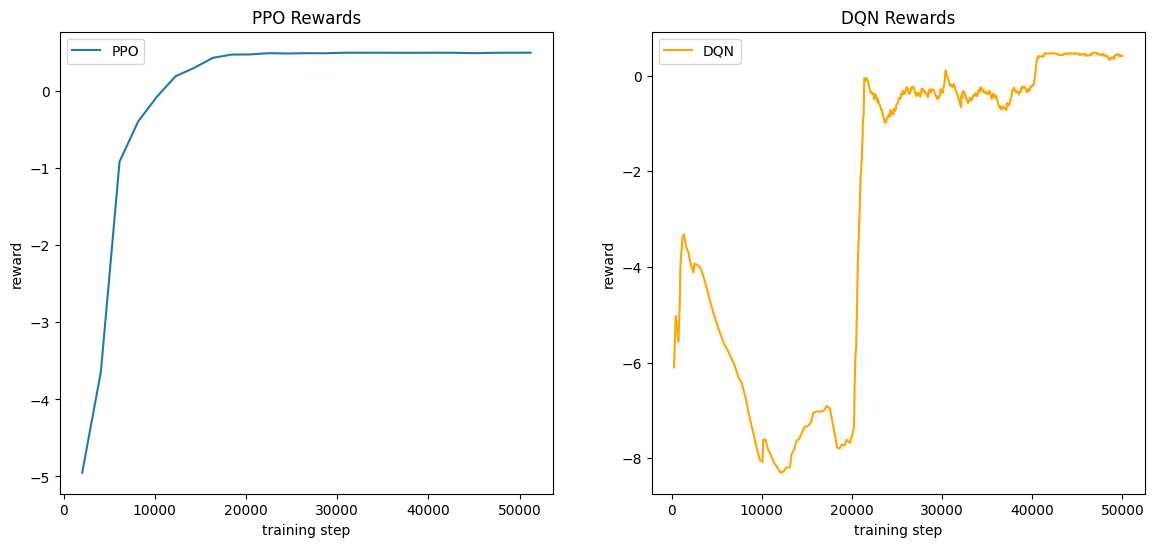

In [ ]:
# define initial parameters
ppo_params = {'learning_rate': 0.0003, 'n_steps': 2048, 'batch_size': 64, 'verbose': 0}
dqn_params = {'learning_rate': 0.0003, 'buffer_size': 10000, 'batch_size': 64, 'verbose': 0}
total_timesteps = 50000
# define vec_env
env = YourAwesomeEnvironment()
vec_env = make_vec_env(lambda: env, n_envs=1)
# train and plot custom env
train_and_plot("Awsome", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params, vec_env_given=vec_env)

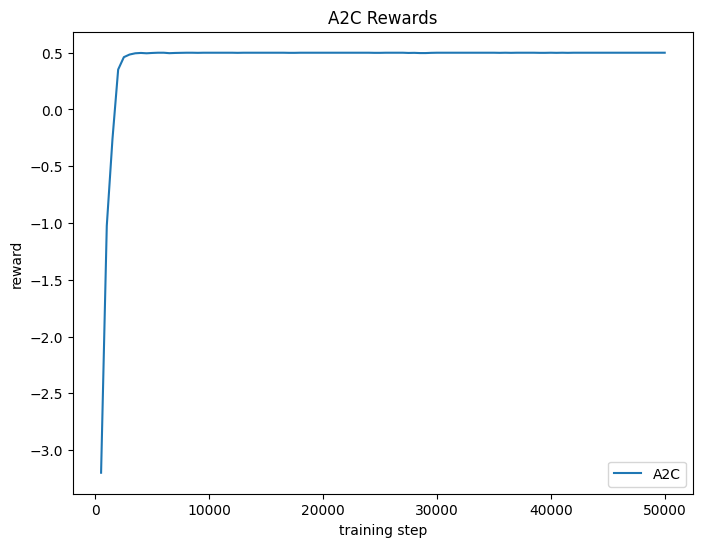

In [ ]:
# train using A2C
from stable_baselines3 import A2C
a2c_model_custom = A2C("MlpPolicy", vec_env, verbose=0, tensorboard_log="./a2c_task2_tb/")
a2c_model_custom.learn(total_timesteps=50000)
# plot the results
dir = "./a2c_task2_tb/"
sub_dir = sorted(os.listdir(dir))[-1]
event_file = os.path.join(dir, sub_dir)
event_acc = EventAccumulator(event_file)
event_acc.Reload()
reward_data = event_acc.Scalars("rollout/ep_rew_mean")
a2c_rewards = [reward.value for reward in reward_data]
a2c_steps = [reward.step for reward in reward_data]
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
ax1.plot(a2c_steps, a2c_rewards, label='A2C')
ax1.set_title('A2C Rewards')
ax1.set_xlabel('training step')
ax1.set_ylabel('reward')
ax1.legend()


📊 Algorithm Comparison
Compare RL algorithms (e.g., PPO, DQN) based on:
- Total reward over time
- Sample efficiency
- Hyperparameters


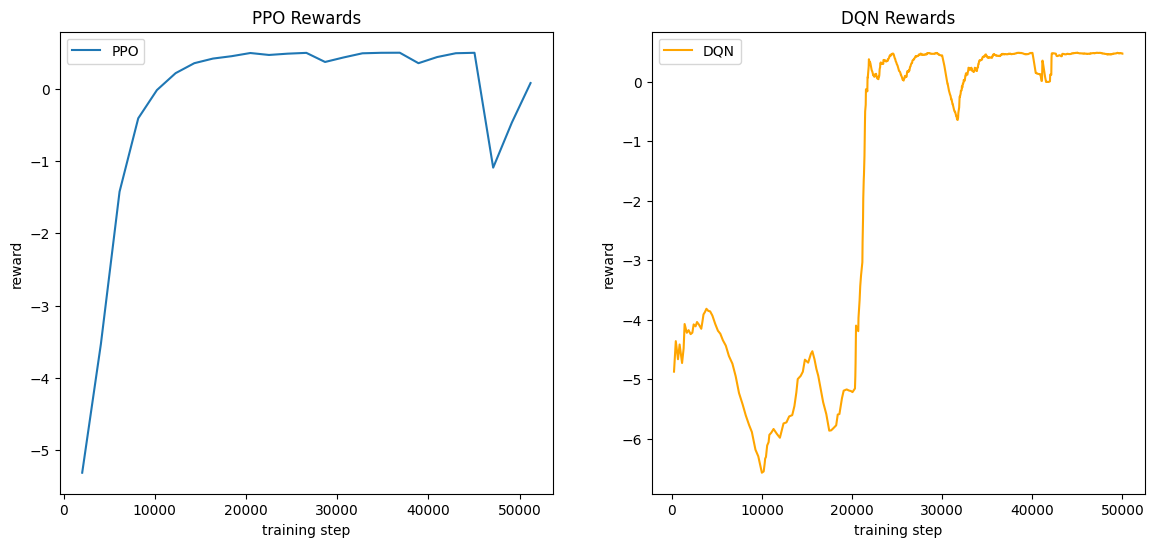

In [ ]:
# modify hyperparameters and plot reward curves
# adjust lr
ppo_params['learning_rate'] = 0.001
dqn_params['learning_rate'] = 0.001
train_and_plot("Awsome", total_timesteps=total_timesteps, ppo_params=ppo_params, dqn_params=dqn_params, vec_env_given=vec_env)
ppo_params['learning_rate'] = 0.0003
dqn_params['learning_rate'] = 0.0003

# **Task 3: Pygame 🎮 Tutorial & Custom RL Environment (Bonus)**

In this bonus task, you will implement a custom RL environment using Pygame and make it Gym-compatible for training an RL agent. Pygame is widely used for 2D game development and can be an excellent tool for creating custom RL environments. You will start by learning basic Pygame concepts (game loop, rendering, input handling), then implement a simple grid-based environment where an agent moves toward a goal while avoiding obstacles. Finally, you will train an RL agent using Stable-Baselines3 (SB3) to solve the environment. If you’re looking for inspiration, consider recreating the Chrome Dino game 🦖 as an RL environment which will be introduced at workshop or future TA sessions, but feel free to explore your own ideas!

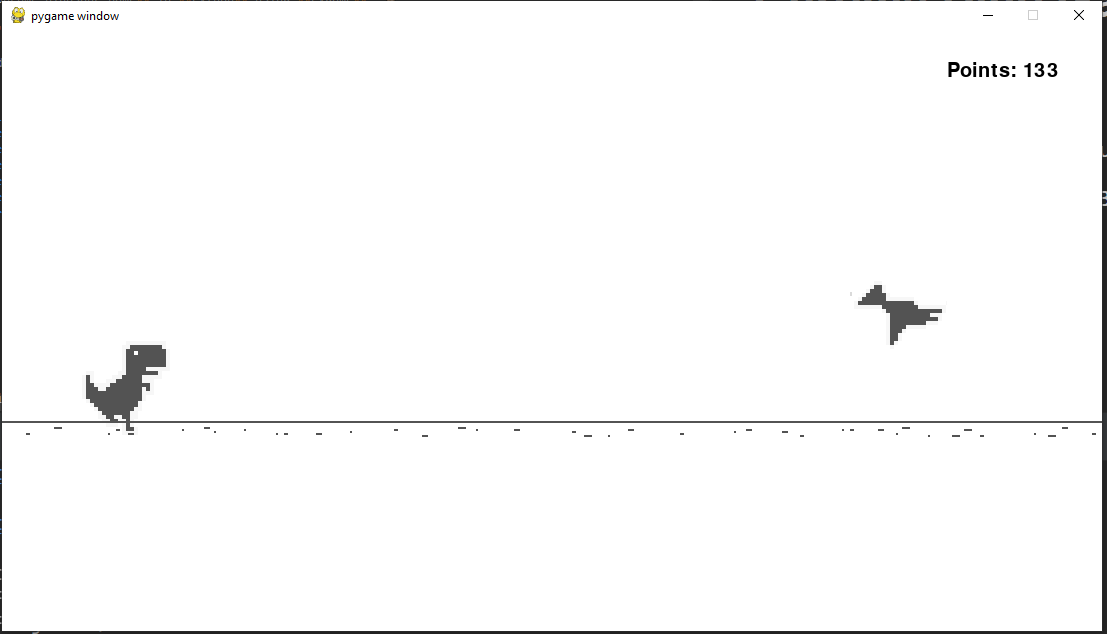

In [ ]:
import pygame
import numpy as np
import os
import random
from gymnasium import Env, spaces

# initialize Pygame
pygame.init()

# screen dimensions
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 400

# colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

# load images
PLAYER_IMAGE = pygame.image.load(os.path.join("images", "player.png"))
PRINCESS_IMAGE = pygame.image.load(os.path.join("images", "princess.png"))
HEART_IMAGE = pygame.image.load(os.path.join("images", "heart.png"))
BANANA_IMAGE = pygame.image.load(os.path.join("images", "banana.png"))
GRASS_IMAGE = pygame.image.load(os.path.join("images", "background.jpg"))

# resize images
PLAYER_IMAGE = pygame.transform.scale(PLAYER_IMAGE, (55, 105))
PRINCESS_IMAGE = pygame.transform.scale(PRINCESS_IMAGE, (120, 120))
HEART_IMAGE = pygame.transform.scale(HEART_IMAGE, (80, 80))
BANANA_IMAGE = pygame.transform.scale(BANANA_IMAGE, (40, 45))
GRASS_IMAGE = pygame.transform.scale(GRASS_IMAGE, (SCREEN_WIDTH, SCREEN_HEIGHT))

# custom gym environment
class DinoGameEnv(Env):
    def __init__(self, render_mode=None):
        super(DinoGameEnv, self).__init__()
        self.render_mode = render_mode  # store render mode

        if render_mode == "rgb_array":
            self.screen = pygame.Surface((SCREEN_WIDTH, SCREEN_HEIGHT))
        else:
            self.screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
            self.render_mode = "human"

        self.clock = pygame.time.Clock()

        # action space: 0 = no action, 1 = jump
        self.action_space = spaces.Discrete(2)
        # observation space: [distance to obstacle, is player on ground]
        self.observation_space = spaces.Box(low=0, high=SCREEN_WIDTH, shape=(2,), dtype=np.float32)

        # game variables
        self.player_pos = [100, SCREEN_HEIGHT - 190]
        self.banana_pos = [SCREEN_WIDTH, SCREEN_HEIGHT - 125]
        self.gravity = 0.8
        self.player_vel_y = 0
        self.is_jumping = False
        self.score = 0
        self.done = False
        self.bananas_passed = 0
        self.next_banana_time = random.randint(80, 150)

    def reset(self, seed=None, options=None):
        # reset game state
        self.player_pos = [100, SCREEN_HEIGHT - 190]
        self.banana_pos = [SCREEN_WIDTH, SCREEN_HEIGHT - 125]
        self.player_vel_y = 0
        self.is_jumping = False
        self.score = 0
        self.done = False
        self.bananas_passed = 0
        self.next_banana_time = random.randint(40, 100)
        return self._get_obs(), {}

    def step(self, action):
        reward = 0
        # handle actions
        if action == 1 and not self.is_jumping:  # jump
            self.player_vel_y = -18
            self.is_jumping = True

        # apply gravity
        self.player_vel_y += self.gravity
        self.player_pos[1] += self.player_vel_y

        # ground collision
        if self.player_pos[1] >= SCREEN_HEIGHT - 190:
            self.player_pos[1] = SCREEN_HEIGHT - 190
            self.is_jumping = False

        # move obstacle
        self.banana_pos[0] -= 5
        if self.banana_pos[0] < -80:
            self.banana_pos[0] = SCREEN_WIDTH + self.next_banana_time
            self.bananas_passed += 1
            self.score += 1
            self.next_banana_time = random.randint(40, 100)  # randomize next spawn
            reward += 10 # for jumping over the obstacle

        # check for collision with obstacle
        if self._check_collision(self.player_pos, self.banana_pos):
            self.done = True
            reward -= 10 # penalty for dying

        if self.is_jumping:
            reward -= 0.5  # penalty for unnecessary jumps

        reward += 1 # for staying alive

        obs = self._get_obs()
        return obs, reward, self.done, False, {}

    def render(self):
        self.screen.fill(WHITE)
        self.screen.blit(GRASS_IMAGE, (0, 0))
        self.screen.blit(PLAYER_IMAGE, self.player_pos)
        self.screen.blit(BANANA_IMAGE, self.banana_pos)

        # display score
        font = pygame.font.SysFont("Arial", 30)
        score_text = font.render(f"Score: {self.score}", True, BLACK)
        self.screen.blit(score_text, (10, 10))

        if self.done:
            font = pygame.font.SysFont("Arial", 40)
            text = font.render("Game Over!", True, BLACK)
            self.screen.blit(text, (SCREEN_WIDTH // 2 - 100, SCREEN_HEIGHT // 2))

        if self.render_mode == "human":
            pygame.display.flip()
            self.clock.tick(90)
        elif self.render_mode == "rgb_array":
            return pygame.surfarray.array3d(self.screen)  # return image as numpy array

    def close(self):
        pygame.quit()

    def _get_obs(self):
        distance_to_obstacle = self.banana_pos[0] - self.player_pos[0]
        is_on_ground = 1 if not self.is_jumping else 0
        return np.array([distance_to_obstacle, is_on_ground], dtype=np.float32)

    def _check_collision(self, player_pos, obstacle_pos):
        player_rect = pygame.Rect(*player_pos, 80, 80)
        obstacle_rect = pygame.Rect(*obstacle_pos, 40, 80)
        return player_rect.colliderect(obstacle_rect)


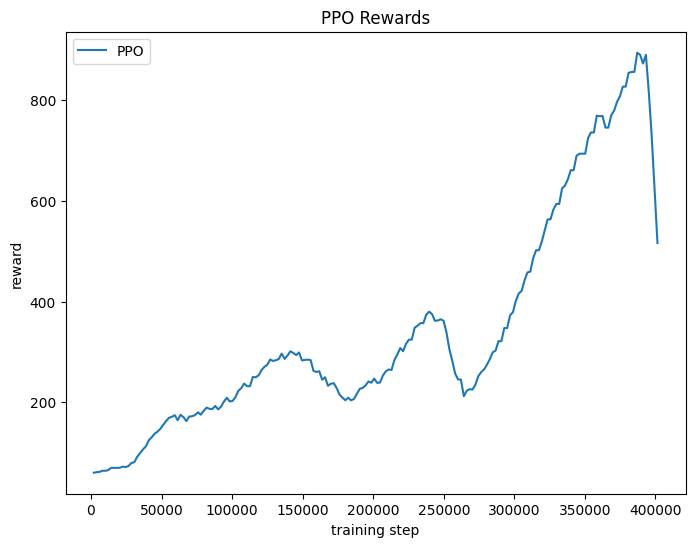

In [ ]:
# wrap environment
env = DinoGameEnv(render_mode="rgb_array")
vec_env = make_vec_env(lambda: env, n_envs=1)

# define PPO model
ppo_model = PPO("MlpPolicy", vec_env, verbose=0, tensorboard_log="./ppo_dino_tb/")

# train the model
ppo_model.learn(total_timesteps=400000)


# plot the tensorboard
dir = "./ppo_dino_tb/"
sub_dir = sorted(os.listdir(dir))[-1]
event_file = os.path.join(dir, sub_dir)
event_acc = EventAccumulator(event_file)
event_acc.Reload()
reward_data = event_acc.Scalars("rollout/ep_rew_mean")
ppo_rewards = [reward.value for reward in reward_data]
ppo_steps = [reward.step for reward in reward_data]
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
ax1.plot(ppo_steps, ppo_rewards, label='PPO')
ax1.set_title('PPO Rewards')
ax1.set_xlabel('training step')
ax1.set_ylabel('reward')
ax1.legend()

In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

pygame.init()
pygame.font.init()

env = RecordVideo(env, "ppo_gameplay")

obs, _ = env.reset()
for _ in range(1000):
    action, _ = ppo_model.predict(obs)
    obs, reward, done, _, info = env.step(action)
    if done:
        break

env.close()
print("Video saved in 'ppo_gameplay/' folder.")


Video saved in 'ppo_gameplay/' folder.


In [ ]:
# run this cell to play the game


# env = DinoGameEnv()
# env.reset()

# running = True
# while running:
#     for event in pygame.event.get():
#         if event.type == pygame.QUIT:
#             running = False

#     # Handle keyboard input (only jump)
#     keys = pygame.key.get_pressed()
#     if keys[pygame.K_SPACE]:  # Jump
#         action = 1
#     else:
#         action = 0  # No action

#     # Step the environment
#     obs, reward, done, _, _ = env.step(action)

#     # Render the game
#     env.render()

#     # pause if the game is over
#     if done:
#         pygame.time.wait(2000)
#         env.reset()

#     # Cap the frame rate
#     env.clock.tick(100)

# env.close()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
